In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from mpl_toolkits import  mplot3d 

# Data Preprocessing and visualization

In [57]:
data=pd.read_csv("polynomial_regression_train.csv")
data

,ID,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Target
0,1,-0.299150,0.980381,-1.244780,0.420551,-0.352235,8.168743e-10
1,2,-0.374319,-1.179867,0.615588,0.054701,0.687182,-5.081225e-10
2,3,-1.240429,-0.139086,-0.001653,0.487685,-0.242808,4.560170e-10
3,4,-0.429881,-1.724246,-0.098046,0.896504,0.318585,-2.647546e-09
4,5,-1.726345,1.945823,1.275979,-0.474670,1.050494,-1.704606e-08
...,...,...,...,...,...,...,...
47995,47996,1.125337,0.229907,-1.789732,-0.571275,-1.900555,7.752513e-09
47996,47997,1.733309,-0.721866,0.958440,0.317420,0.108628,7.770135e-09
47997,47998,-1.677538,1.758274,1.020534,0.346496,1.313755,-1.096204e-08
47998,47999,1.313345,0.315358,-0.060629,0.703251,-0.618520,1.962097e-09


<function matplotlib.pyplot.show(close=None, block=None)>

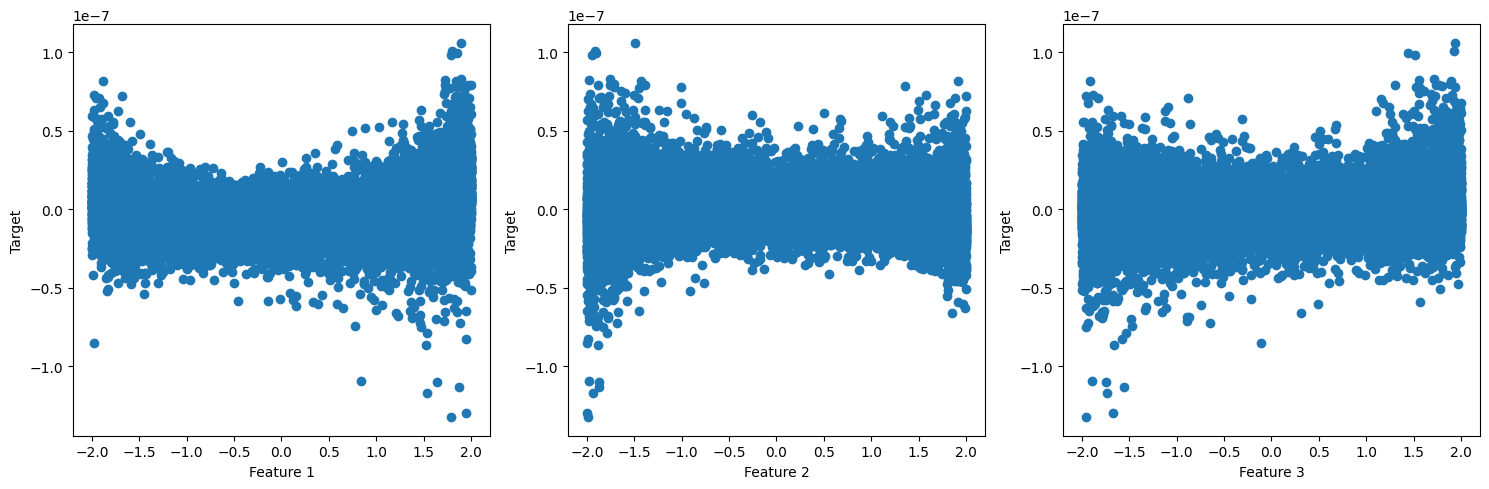

In [58]:
m,n=data.shape
x_show=data.iloc[:,1:4].values
y_show=data.iloc[:,n-1:n].values

fig,ax=plt.subplots(1,3,figsize=(15,5))
ax[0].scatter(x_show[:,0],y_show)
ax[0].set_xlabel("Feature 1")
ax[0].set_ylabel("Target")
ax[1].scatter(x_show[:,1],y_show)
ax[1].set_xlabel("Feature 2")
ax[1].set_ylabel("Target")
ax[2].scatter(x_show[:,2],y_show)
ax[2].set_xlabel("Feature 3")
ax[2].set_ylabel("Target")
plt.tight_layout()
plt.show

3D plot:

<function matplotlib.pyplot.show(close=None, block=None)>

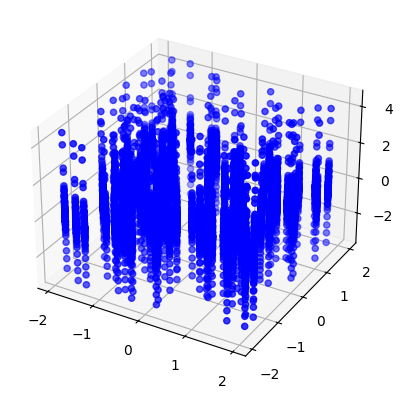

In [59]:
x_3d=data.iloc[:,1:3].values
ax=plt.axes(projection='3d')
ax.scatter(x_3d[:100,0],x_3d[:100,1],y_show[:100],color='b')   #plotting the first 100 examples
plt.show

In [60]:
def cost(x_tr, y_tr, w, b, lamda):
    m = x_tr.shape[0]
    err = ((np.dot(x_tr, w) + b) - y_tr)**2
    total_cost = np.sum(err) / (2 * m) + (lamda/(2*m))*np.dot(w.T,w)
    return total_cost.ravel()

In [61]:
def gradient(x_tr, y_tr, w, b,lamda):
    m=x_tr.shape[0]
    predictions=np.dot(x_tr, w)+b
    errors=predictions-y_tr
    dj_dw = np.dot(x_tr.T, errors) / m  + (lamda/m)*w
    dj_db = np.sum(errors) / m          

    return dj_dw, dj_db

In [62]:
def grad_descent(x_tr, y_tr,alpha, iters, w_in, b_in, lamda,cost, gradient):
    j = []
    m,n = x_tr.shape
    w = w_in[:,np.newaxis]
    b = b_in
    j.append(cost(x_tr, y_tr, w,b, lamda))
    for i in range(iters):
        g1, g2 =  gradient(x_tr, y_tr, w, b, lamda)
        w = w - alpha*g1
        b = b - alpha*g2

        if i < 100000:
            j.append(cost(x_tr, y_tr, w,b, lamda))
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(iters/10) == 0:
            print(f"Iteration {i}: Cost {j[-1]}")
    return w,b,j

In [63]:
def getting_degreed_terms(x_tr,deg):
    for i in range(deg+1):
        for j in range(deg+1-i):
            for k in range(deg+1-i-j):
                for l in range(deg+1-i-j-k):
                    for m in range(deg+1-i-j-k-l):
                        x_tr=np.append(x_tr,np.transpose(np.array([x_tr[:,0]**i*x_tr[:,1]**j*x_tr[:,2]**k*x_tr[:,3]**l*x_tr[:,4]**m])),axis=1)
    return x_tr[:,6:]


In [64]:
def z_score_normalization(x_tr):
    mean=np.mean(x_tr,axis=0)
    std=np.std(x_tr,axis=0)
    x_tr=(x_tr-mean)/std
    return x_tr

In [65]:
def predict(w,b,x_tr):
    return (np.dot(x_tr,w)+b)

In [66]:
#main

data=pd.read_csv("polynomial_regression_train.csv")

m,n=data.shape

x_tr_init=data.iloc[:,1:n-1].values
y_tr_init=data.iloc[:,n-1:n].values

x=getting_degreed_terms(x_tr_init,5)

x_tr=z_score_normalization(x)
y_tr=z_score_normalization(y_tr_init)

# Defining the Hyperparameters.
iters = 10000
alpha = 0.01
lamda=100

w_in = np.zeros(x_tr.shape[1])
b_in = 0

w_fin, b_fin, losses= grad_descent(x_tr, y_tr,alpha, iters, w_in, b_in,lamda, cost, gradient)
print(f"w,b found by gradient descent are: {w_fin},{b_fin}")

prediction  = predict(w_fin, b_fin, x_tr)
for i in range(x_tr.shape[0]):
    print(f"prediction: {prediction[i]}, target: {y_tr[i]}")


Iteration 0: Cost [0.46966117]
Iteration 1000: Cost [0.03427562]
Iteration 2000: Cost [0.02857174]
Iteration 3000: Cost [0.02673014]
Iteration 4000: Cost [0.02599639]
Iteration 5000: Cost [0.02569107]
Iteration 6000: Cost [0.02556066]
Iteration 7000: Cost [0.02550345]
Iteration 8000: Cost [0.02547756]
Iteration 9000: Cost [0.02546539]
w,b found by gradient descent are: [[-1.92493230e-02]
 [ 1.65946052e-01]
 [ 2.58433080e-02]
 [-3.07191367e-01]
 [ 4.63764527e-02]
 [ 1.22442825e-02]
 [ 1.76840217e-01]
 [ 1.34081669e-02]
 [ 5.07133398e-02]
 [-6.66969198e-03]
 [-2.69660580e-02]
 [-2.31215707e-02]
 [-1.95977603e-01]
 [ 5.05405753e-02]
 [ 2.71790800e-02]
 [-1.28443300e-01]
 [-3.32242800e-02]
 [-1.54569772e-02]
 [ 5.36263658e-02]
 [ 3.86098564e-02]
 [-7.13994844e-03]
 [-4.41691635e-02]
 [ 9.99080761e-03]
 [ 4.32635941e-02]
 [-5.17255673e-02]
 [ 2.25638999e-02]
 [ 9.16154087e-04]
 [ 3.74582968e-02]
 [ 3.04319462e-02]
 [ 8.88844601e-03]
 [-4.60809112e-02]
 [ 3.25539433e-02]
 [ 7.80912009e-02]
 

Plotting the Loss curve

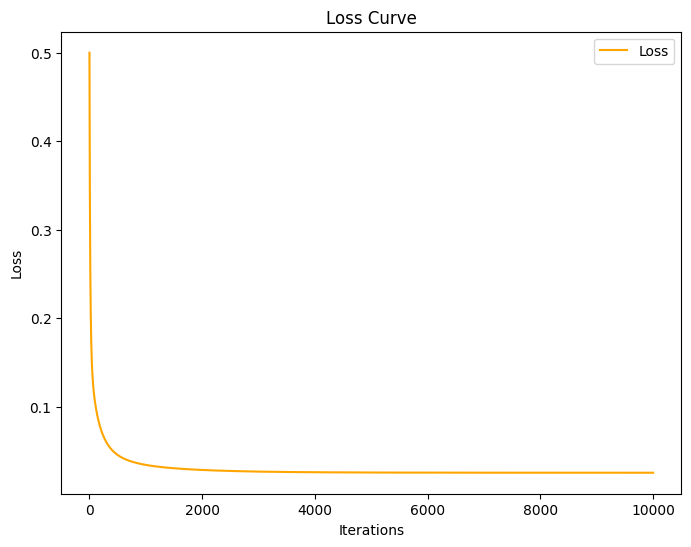

In [67]:
iterations=list(range(1,len(losses)+1))
plt.figure(figsize=(8,6))
plt.plot(iterations, losses, color='orange', label='Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.show()

Calculating the R2 score.

In [68]:
y_mean=np.mean(y_tr)
ss_residual = np.sum((y_tr - prediction) ** 2)  
ss_total = np.sum((y_tr- y_mean) ** 2)     
r2_score = 1 - (ss_residual / ss_total)

print(f"R^2 Score: {r2_score:.2f}")

R^2 Score: 0.95
